In [1]:
#importing required libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [2]:
#creating file to import the data using mysql
file=mysql.connector.connect(
    host='localhost',
    user='root',
    password='prdp',
    database='test')

In [59]:
#reading the sql query using file created for importing of data
student=pd.read_sql_query('select * from student',file)

In [4]:
#Putting the data to pandas dataframe for further operations as it provides numerous features for eda
stud=pd.DataFrame(student)
stud

,Name,Gender,DOB,Maths,physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,5/4/1988,55,45,56,87,21,52,89,65
1,Suresh,M,4/5/1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25/5/1989,25,54,89,76,95,87,56,74
3,Jessica,F,12/8/1990,78,96,86,63,54,89,75,45
4,Jennifer,F,2/9/1989,58,96,78,46,96,77,83,53
5,Annu,F,5/4/1988,45,87,52,89,55,89,87,52
6,pooja,F,4/5/1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25/5/1989,54,76,87,56,25,56,76,87
8,Farha,F,12/8/1990,55,63,89,75,78,75,63,89
9,Mukesh,M,2/9/1989,96,46,77,83,58,83,46,77


In [5]:
#check for the datatypes of the data
stud.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [6]:
#creation for one extra rows having total marks of every student
total=0
list=['Maths','physics','Chemistry','English','Biology','Economics','History','Civics']
for col in list:
       total=total+stud[col]

In [7]:
#putting the values of total marks to total column of the dataframe
stud['Total']=total
#to check the data structure,we use head function
stud.head(2)

,Name,Gender,DOB,Maths,physics,Chemistry,English,Biology,Economics,History,Civics,Total
0,John,M,5/4/1988,55,45,56,87,21,52,89,65,470
1,Suresh,M,4/5/1987,75,96,78,64,90,61,58,2,524


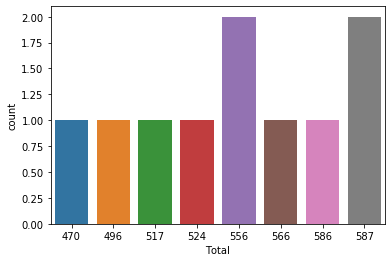

In [8]:
#plotting visuals for every student total marks
sns.countplot(x='Total',data=stud)

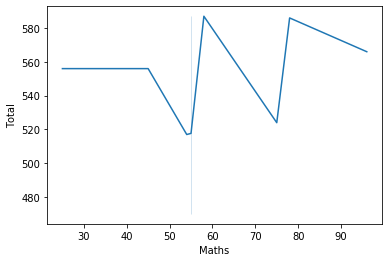

In [9]:
#checking the variations of total marks wrt to maths
sns.lineplot(x='Maths',y='Total',data=stud)

In [10]:
#dropping the columns having very less impact on data
stud.drop(['Name','DOB'],axis=1,inplace=True)

In [11]:
#check for the null values in the dataset
stud.isnull().sum()

Gender       0
Maths        0
physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
Total        0
dtype: int64

In [12]:
#conversion of categorical column from str to numeric and to get uniform analysis
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
stud['Gender']=le.fit_transform(stud['Gender'].astype(str))

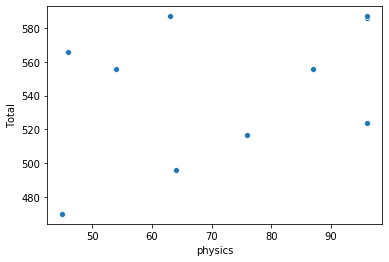

In [13]:
#scatterplot for total wrt to physics marks
sns.scatterplot(x='physics',y='Total',data=stud)

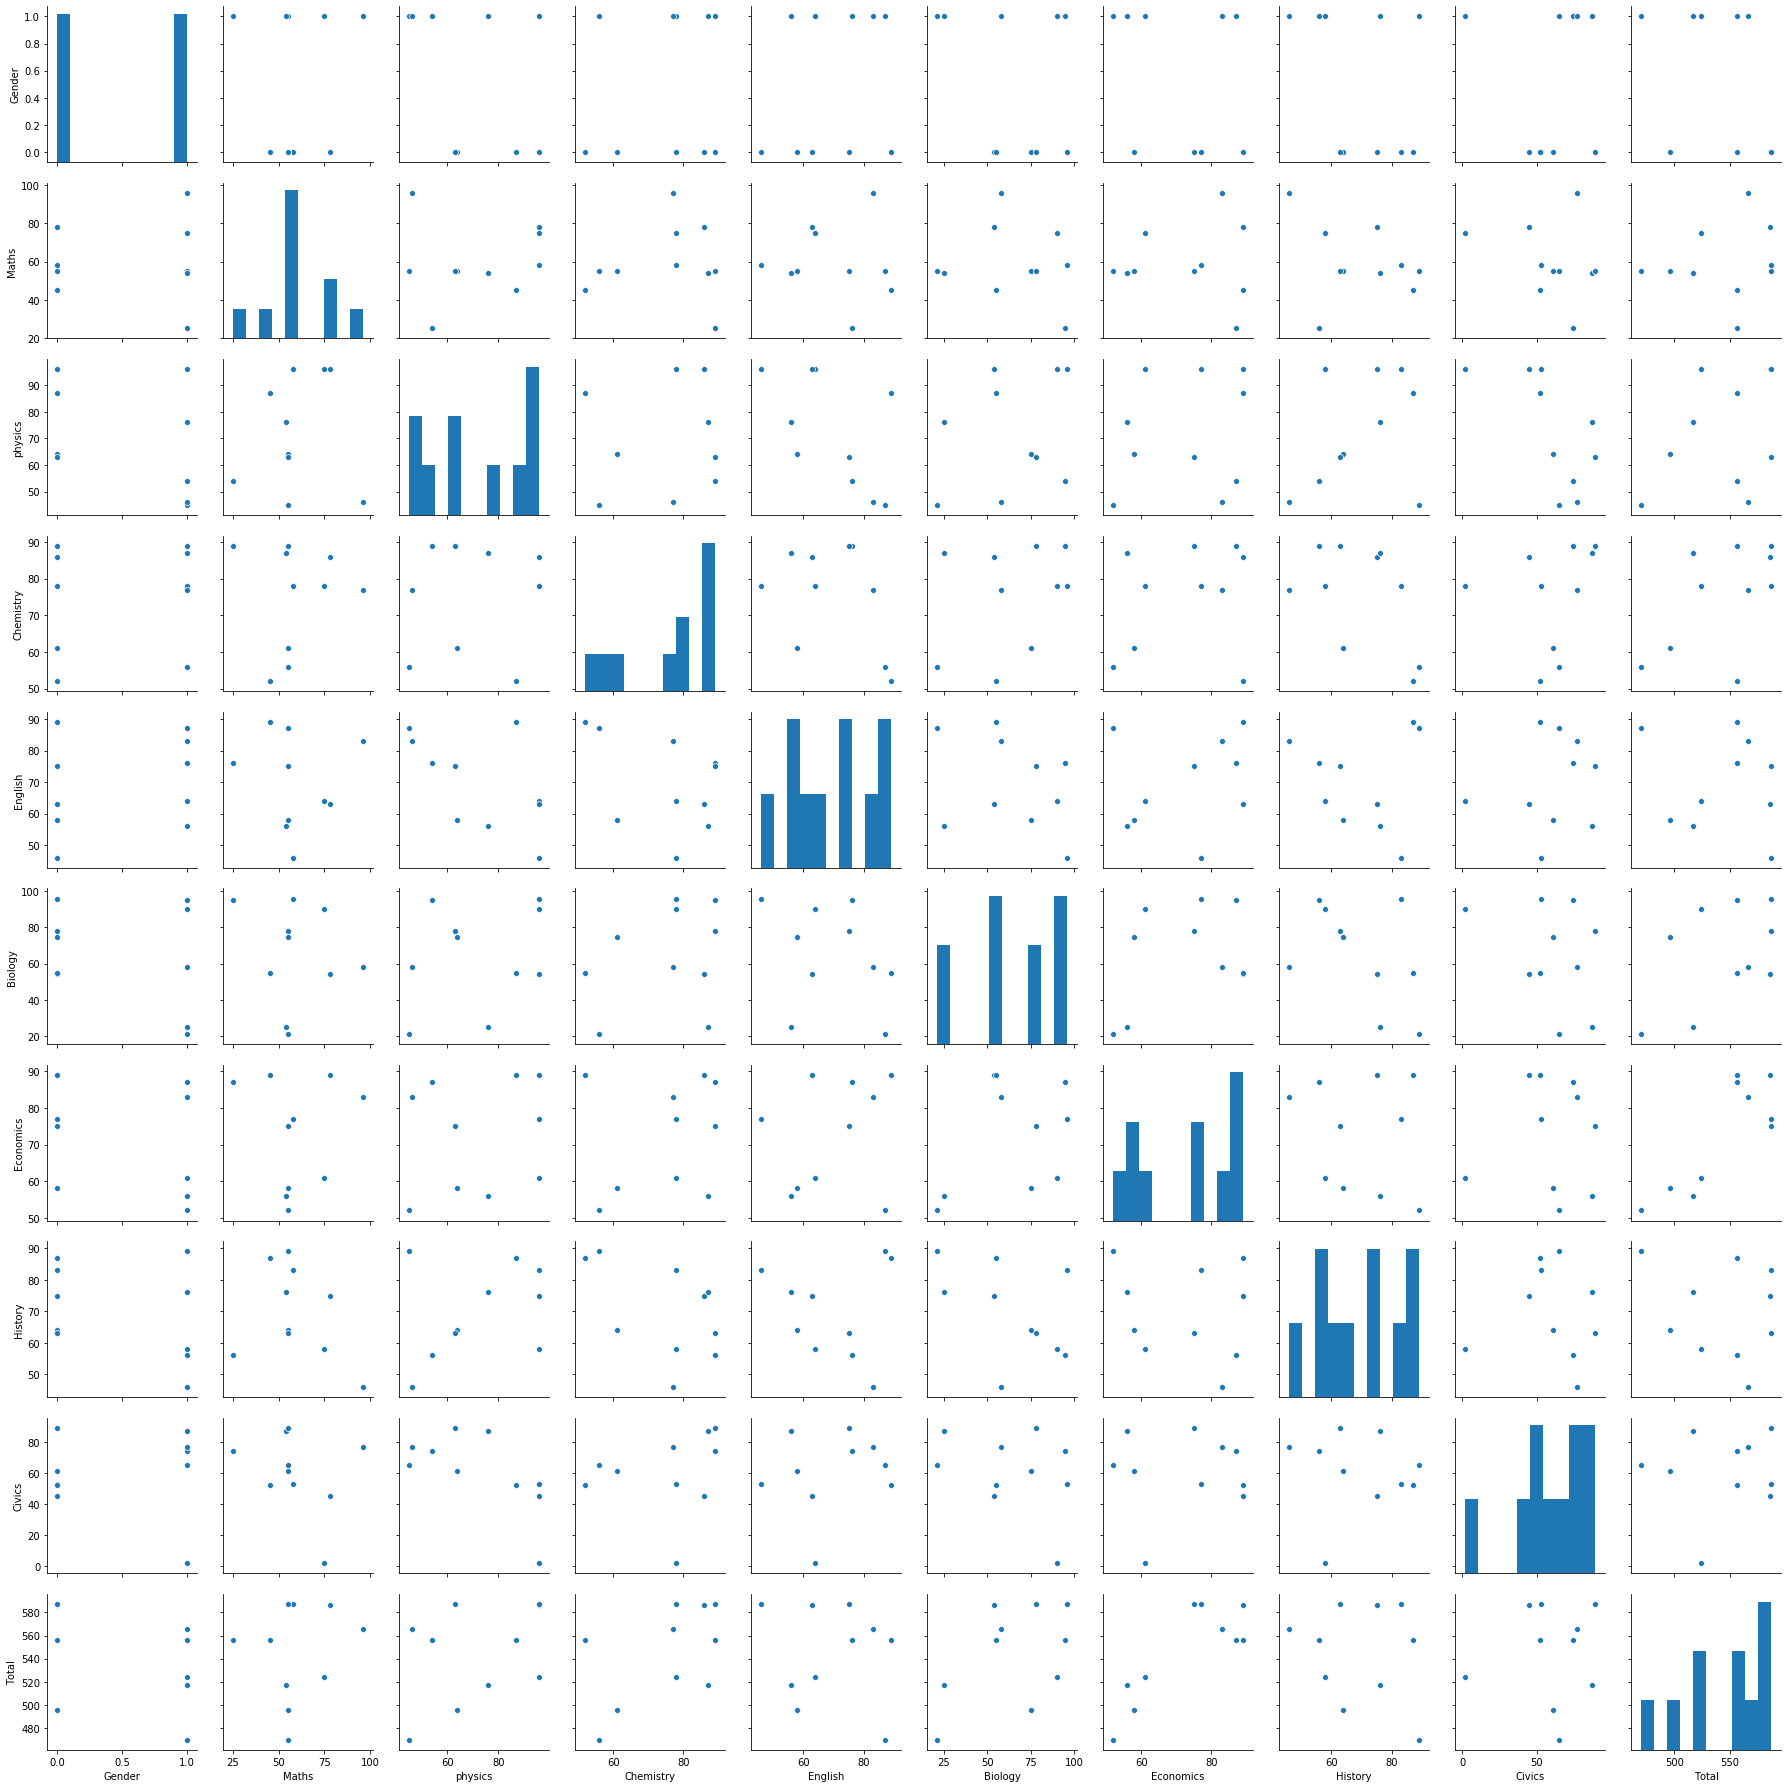

In [14]:
#check for every data visuals using pairplot
sns.pairplot(stud)

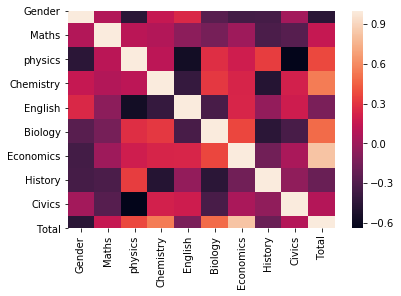

In [15]:
#correlation among various columns
sncor=stud.corr()
sns.heatmap(sncor)

In [16]:
stud.describe()

,Gender,Maths,physics,Chemistry,English,Biology,Economics,History,Civics,Total
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,0.500000,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000,544.50000
std,0.527046,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432,41.01558
min,0.000000,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000,470.00000
25%,0.000000,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500,518.75000
50%,0.500000,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000,556.00000
75%,1.000000,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500,581.00000
max,1.000000,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000,587.00000


In [17]:
#from the describe function,we see there is no outliers in student dataset and very less diffrence b/w 75 percentile and max values

In [18]:
#Importing data from csv format and putting data to the dataframe
t=pd.read_csv('titanic_train.csv')
ship=pd.DataFrame(t)
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


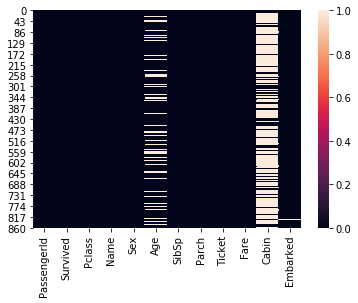

In [19]:
#detecting for null values using heatmap
sns.heatmap(ship.isnull())

In [20]:
#check for the null values count in each column
ship.isnull().sum()
#there is three column having null values we need to adjust

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
#importing LabelEncoder and Imputer for furthur operations
from sklearn.preprocessing import LabelEncoder,Imputer
#creating instance for labelEncoder
le=LabelEncoder()

In [22]:
list=['Pclass','Sex','Parch','Embarked','Cabin']
for val in list:
    ship[val]=le.fit_transform(ship[val].astype(str))
#the above program convert the categorical one in uniformed way

In [23]:
#creating instance for imputer
import warnings
warnings.filterwarnings('ignore')
#we need to supress warnings using the above
im=Imputer(missing_values='NaN',strategy='mean')
#implying the above method to age column
ship['Age']=im.fit_transform(ship['Age'].values.reshape(-1,1))

In [24]:
#another instance of Imputer for applying mode
imp=Imputer(missing_values='NaN',strategy='most_frequent')
ship['Embarked']=imp.fit_transform(ship['Embarked'].values.reshape(-1,1))
ship['Cabin']=imp.fit_transform(ship['Cabin'].values.reshape(-1,1))

In [25]:
#again check for any count of null values
ship.isnull().sum()
#So now we don't have any null values left

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
#getting info of data
ship.info()
#This gives us the datatype,count and null info of every column in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int32
Name           891 non-null object
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int32
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null float64
dtypes: float64(4), int32(3), int64(3), object(2)
memory usage: 73.2+ KB


In [27]:
#description of dataframe
ship.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,1.308642,0.647587,29.699118,0.523008,0.381594,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,36.024237,0.794231
min,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,2.000000,1.000000,29.699118,0.000000,0.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,2.000000,1.000000,35.000000,1.000000,0.000000,31.000000,147.000000,2.000000
max,891.000000,1.000000,2.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000,3.000000


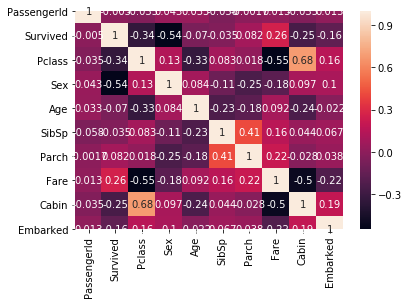

In [57]:
#plotting of correlation using heatmap
shipcor=ship.corr()
sns.heatmap(shipcor,annot=True)

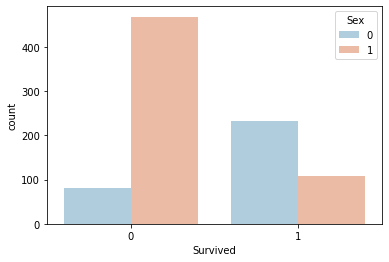

In [28]:
#check for the survived passengers wrt to sex
sns.countplot(x='Survived',hue='Sex',data=ship,palette='RdBu_r')

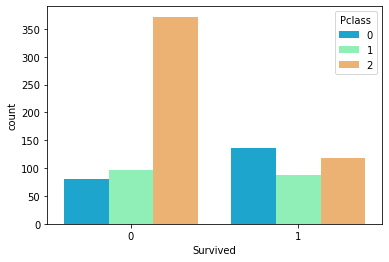

In [29]:
#check for the survived passengers count in each class
sns.countplot(x='Survived',hue='Pclass',data=ship,palette='rainbow')

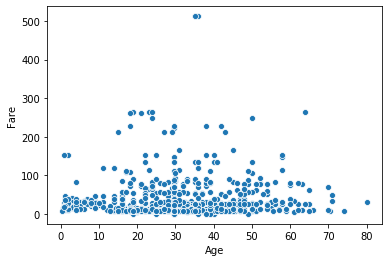

In [30]:
#plotting scatterplot b/w age and fare data
sns.scatterplot(x='Age',y='Fare',data=ship)

In [31]:
#Importing the data from mysql table
w=pd.read_sql_query('select * from wine',file)

In [32]:
#putting the data to the dataframe for furthur more operations
wine=pd.DataFrame(w)
#Lets see the structure of the data
wine.head()

,class,alcohol,malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,diluted,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


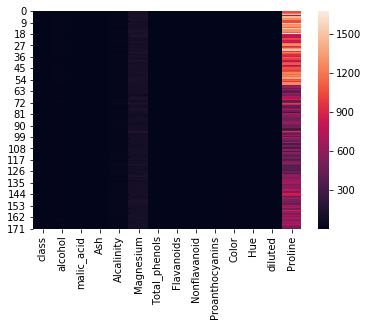

In [33]:
#check for any null values in the dataset using heatmap
sns.heatmap(wine)
#from this we get zero null values

In [36]:
#lets check for the datatypes
wine.dtypes

class                int64
alcohol            float64
malic_acid         float64
Ash                float64
Alcalinity         float64
Magnesium          float64
Total_phenols      float64
Flavanoids         float64
Nonflavanoid       float64
Proanthocyanins    float64
Color              float64
Hue                float64
diluted            float64
Proline              int64
dtype: object

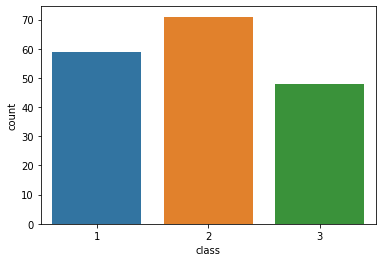

In [42]:
#lets check for the quantity of each class
sns.countplot(x='class',data=wine)

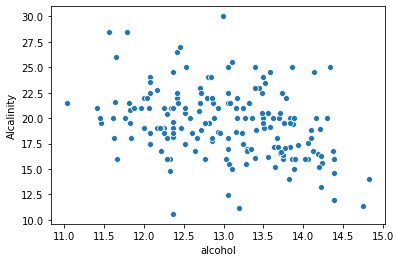

In [43]:
#plotting of scatterplot b/w alcohol and alcalinity
sns.scatterplot(x='alcohol',y='Alcalinity',data=wine)

In [44]:
#Correlation b/w each column
wincor=wine.corr()
wincor

,class,alcohol,malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,diluted,Proline
class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


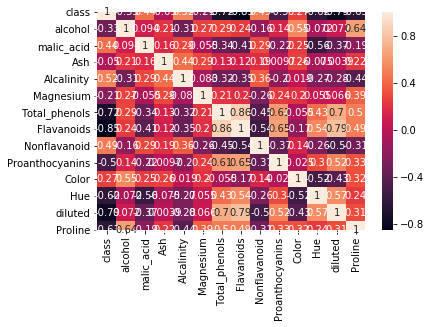

In [58]:
#plotting correlation using heatmap
sns.heatmap(wincor,annot=True)

In [46]:
#Lets see the description of each column
wine.describe()
#from describe we see there are some outliers in columns in magnesium and proline

,class,alcohol,malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,diluted,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [47]:
#Importing zscore for outliers
from scipy.stats import zscore
z=np.abs(zscore(wine))

In [48]:
#creating new dataset as per impact of zscore
wine_new=wine[(z<3).all(axis=1)]

In [50]:
print(wine.shape)
print(wine_new.shape)
#from the above,we see there is diffrence of around 10 in dataset after appling zscore

(178, 14)
(168, 14)


In [51]:
#importing boxcox for handling outliers
from scipy.stats import boxcox
list=['Magnesium','Proline']
for i in list:
    wine[i]=boxcox(wine[i],0)

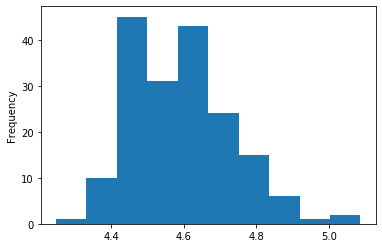

In [52]:
#plotting of histplot for magnesium and proline
wine['Magnesium'].plot.hist()

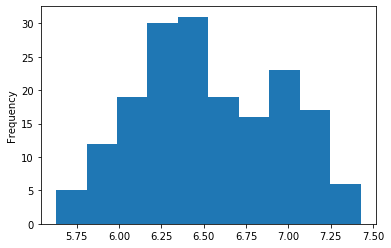

In [53]:
wine['Proline'].plot.hist()

In [54]:
#let check for description table one more time
wine.describe()

,class,alcohol,malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,diluted,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,4.593042,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,6.530303
std,0.775035,0.811827,1.117146,0.274344,3.339564,0.136627,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,0.415107
min,1.000000,11.030000,0.740000,1.360000,10.600000,4.248495,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,5.627621
25%,1.000000,12.362500,1.602500,2.210000,17.200000,4.477337,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,6.215606
50%,2.000000,13.050000,1.865000,2.360000,19.500000,4.584967,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,6.512486
75%,3.000000,13.677500,3.082500,2.557500,21.500000,4.672829,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,6.892642
max,3.000000,14.830000,5.800000,3.230000,30.000000,5.087596,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,7.426549


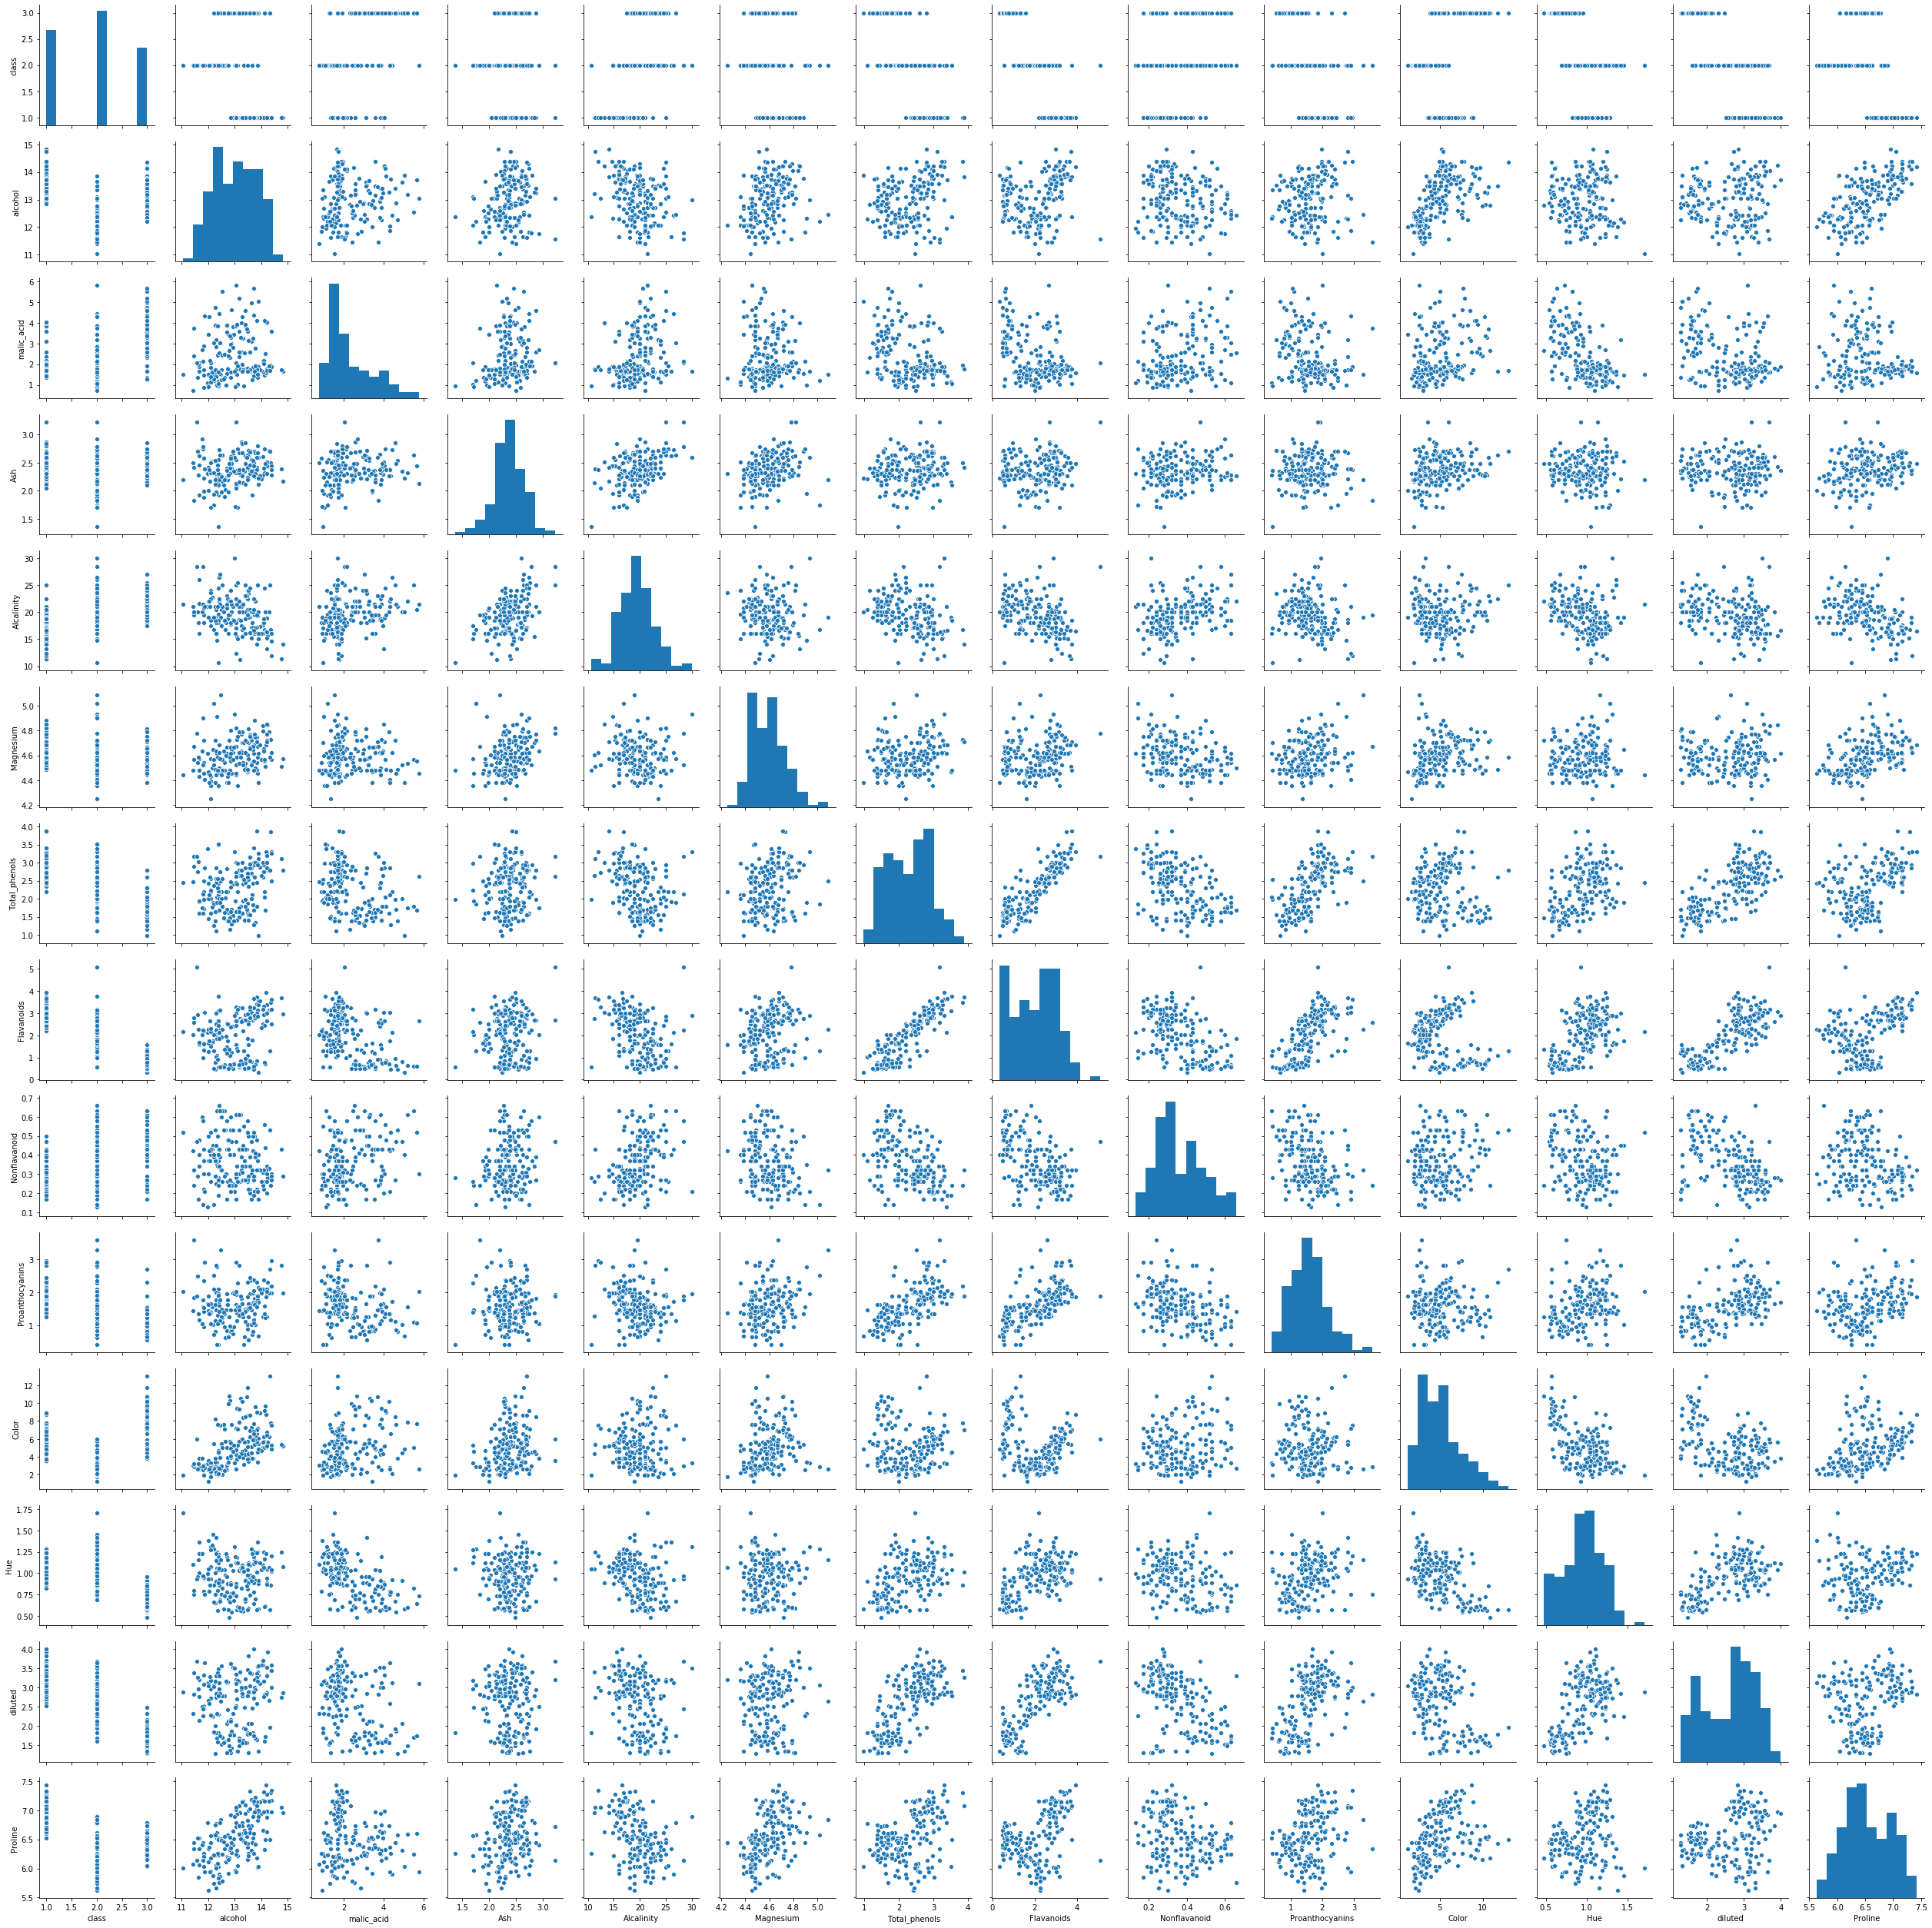

In [55]:
#plotting pairplot
sns.pairplot(wine)